In [2]:
import pandas as pd

# 폴더/파일을 관리하는 os 라이브러리를 불러옵니다.(just 상대경로 text 변수에 담기)
dirpath_2 = './../rawfiles/CARD_SUBWAY_MONTH_201902.csv'
dirpath_3 = './../rawfiles/CARD_SUBWAY_MONTH_201903.csv'
dirpath_1 = './../rawfiles/CARD_SUBWAY_MONTH_201901.csv'
dirpath_4 = './../rawfiles/CARD_SUBWAY_MONTH_201904.csv'
dirpath_5 = './../rawfiles/CARD_SUBWAY_MONTH_201905.csv'
dirpath_6 = './../rawfiles/CARD_SUBWAY_MONTH_201906.csv'

In [3]:
# 이번에 여러 파일을 불러오겠습니다. (걍 예제코드에 있어서 비슷하게 작성해본 코드 입니다. GLOBE 사용시 불필요한 반복 코드를 줄일 수 있습니다.)
# 6개 파일 불러와서 합치기

raw = pd.DataFrame()
raw.head()

temp1 = pd.read_csv(dirpath_1)
temp2 = pd.read_csv(dirpath_2)
temp3 = pd.read_csv(dirpath_3)
temp4 = pd.read_csv(dirpath_4)
temp5 = pd.read_csv(dirpath_5)
temp6 = pd.read_csv(dirpath_6)


# pandas concat 합치때, 인덱스 번호 그래로 간다. 옵션 ignore_index=True 사용하면 인덱스 새로 생성
raw = pd.concat([temp1, temp2, temp3, temp4, temp5, temp6], axis=0)

- 귀무가설: 승차 총 승객수 하차 총 승객수 평균은 차이가 없다.
- 대립가설: 승차 총 승객수 하차 총 승객수 평균은 차이가 있다.

In [4]:
import pandas as pd
from scipy import stats

# 'raw' 데이터프레임에 '승차총승객수'와 '하차총승객수' 컬럼이 있다고 가정합니다.

# 대응표본 T-검정 수행
t_statistic, p_value = stats.ttest_rel(raw['승차총승객수'], raw['하차총승객수'])

# 결과 출력
print(f"T-통계량: {t_statistic}")
print(f"P-값: {p_value}")

# P-값에 따른 결과 해석
if p_value < 0.05:
    print("\nP-값이 0.05보다 작으므로, 귀무가설을 기각합니다.")
    print("-> 승차 총승객수와 하차 총승객수의 평균에는 통계적으로 유의미한 차이가 있습니다.")
else:
    print("\nP-값이 0.05보다 크므로, 귀무가설을 기각할 수 없습니다.")
    print("-> 승차 총승객수와 하차 총승객수의 평균에는 통계적으로 유의미한 차이가 있다고 보기 어렵습니다.")

T-통계량: 11.256211330200182
P-값: 2.242127995329152e-29

P-값이 0.05보다 작으므로, 귀무가설을 기각합니다.
-> 승차 총승객수와 하차 총승객수의 평균에는 통계적으로 유의미한 차이가 있습니다.


- 가설: 하차와 승차 승객 수 사이에 관계가 있는가?

In [5]:
from scipy.stats import pearsonr

# 상관계수와 p-값 계산
correlation, p_value = pearsonr(raw['승차총승객수'], raw['하차총승객수'])

print(f"상관계수: {correlation}")
print(f"P-값: {p_value}")

if p_value < 0.05:
    print("-> 두 변수 간에 통계적으로 유의미한 상관관계가 있습니다.")
else:
    print("-> 두 변수 간에 유의미한 상관관계가 있다고 보기 어렵습니다.")

상관계수: 0.9937548034491436
P-값: 0.0
-> 두 변수 간에 통계적으로 유의미한 상관관계가 있습니다.


In [6]:
# 승차 및 하차 데이터의 기술 통계량 요약
summary = raw[['승차총승객수', '하차총승객수']].describe()

print(summary)

              승차총승객수         하차총승객수
count  107028.000000  107028.000000
mean    12583.723568   12532.496160
std     13065.744800   13286.027729
min         1.000000       0.000000
25%      4150.000000    3967.000000
50%      8810.000000    8535.000000
75%     16468.000000   16427.500000
max    132727.000000  139617.000000


승차 승객 수와 하차 승객 수의 차이(승차총승객수 - 하차총승객수)가 가장 크거나 가장 작은 역을 찾아내어, 그 역의 특성을 분석합니다.

In [7]:
# 승차와 하차 승객 수의 차이 계산
raw['승하차차이'] = raw['승차총승객수'] - raw['하차총승객수']

# 차이가 가장 큰 역 찾기
max_diff_station = raw.loc[raw['승하차차이'].idxmax()]
min_diff_station = raw.loc[raw['승하차차이'].idxmin()]

print("승하차 차이가 가장 큰 역:")
print(max_diff_station[['역명', '승차총승객수', '하차총승객수', '승하차차이']])
print("\n승하차 차이가 가장 작은 역:")
print(min_diff_station[['역명', '승차총승객수', '하차총승객수', '승하차차이']])

승하차 차이가 가장 큰 역:
         역명   승차총승객수   하차총승객수    승하차차이
3179   경마공원  17869.0  18238.0   -369.0
3179  고속터미널  76268.0  39946.0  36322.0
3179    서울숲   8810.0   8651.0    159.0
3179    수리산   3524.0   2948.0    576.0
3179     정왕   6504.0   7909.0  -1405.0
3179     지행   5933.0   5865.0     68.0

승하차 차이가 가장 작은 역:
          역명   승차총승객수   하차총승객수    승하차차이
1264      안국  25781.0  26721.0   -940.0
1264   고속터미널  38593.0  58977.0 -20384.0
1264  성신여대입구  16526.0  16216.0    310.0
1264      봉천  29077.0  26948.0   2129.0
1264     신대방  33980.0  31818.0   2162.0
1264      매봉  14126.0  13428.0    698.0


- 승차 > 하차:  출근 시간대에 사람들이 많이 타고 내리는 역일 가능성이 큽니다. 예를 들어, 주거 지역에 위치한 역일 수 있습니다.
- 승차 < 하차:  퇴근 시간대에 사람들이 많이 내리고 타는 역일 가능성이 큽니다. 예를 들어, 업무 지역에 위치한 역일 수 있습니다.
- 승차 ≈ 하차:  주거 지역과 업무 지역이 혼재된 지역에 위치한 역일 수 있습니다.

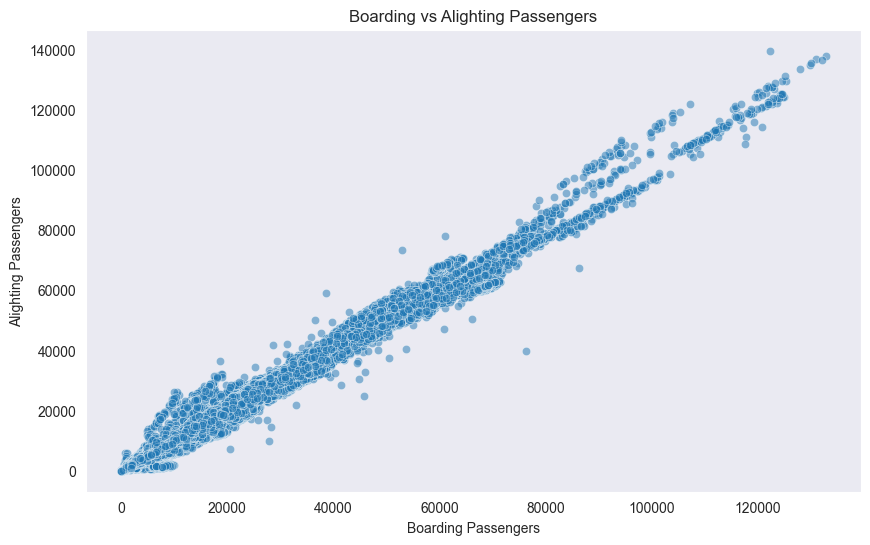

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=raw, x='승차총승객수', y='하차총승객수', alpha=0.5)
plt.title('Boarding vs Alighting Passengers')
plt.xlabel('Boarding Passengers')
plt.ylabel('Alighting Passengers')
plt.grid()
plt.show()

- 대체로 양의 상관관계를 가지고 있음

In [12]:
# 역별로 평일/주말 이용객수의 차이를 분석하여, 평일 이용객이 많으면 비관광지, 주말 이용객이 많으면 관광지로 분류해보겠습니다

# 평일과 주말 설정(요일 row가 존재하지 않음)
raw['요일'] = pd.to_datetime(raw['사용일자'], format='%Y%m%d').dt.dayofweek
raw['평일'] = raw['요일'] < 5  # 월~금: True, 토~일: False
raw['주말'] = raw['요일'] >= 5  # 토~일: True

# 평일과 주말 승차 및 하차 승객수 합계 계산
weekday_data = raw[raw['평일']].groupby('역명')[['승차총승객수', '하차총승객수']].sum().reset_index()
weekend_data = raw[raw['주말']].groupby('역명')[['승차총승객수', '하차총승객수']].sum().reset_index()

# 평일과 주말 데이터를 병합
merged_data = pd.merge(weekday_data, weekend_data, on='역명', suffixes=('_평일', '_주말'))

# 평일과 주말 승차 및 하차 승객수 비교
merged_data['승차차이'] = merged_data['승차총승객수_평일'] - merged_data['승차총승객수_주말']
merged_data['하차차이'] = merged_data['하차총승객수_평일'] - merged_data['하차총승객수_주말']

print(merged_data[['역명', '승차총승객수_평일', '승차총승객수_주말', '승차차이', '하차총승객수_평일', '하차총승객수_주말', '하차차이']])

           역명  승차총승객수_평일  승차총승객수_주말       승차차이  하차총승객수_평일  하차총승객수_주말  \
0    4.19민주묘지   471829.0   121613.0   350216.0   463051.0   109248.0   
1          가능  1017563.0   302104.0   715459.0   962740.0   274800.0   
2        가락시장  2612441.0   620853.0  1991588.0  2747089.0   653553.0   
3     가산디지털단지  8871898.0  1239419.0  7632479.0  9296757.0  1274624.0   
4          가양  2982242.0   796395.0  2185847.0  2892443.0   756092.0   
..        ...        ...        ...        ...        ...        ...   
504        회기  4141511.0  1262316.0  2879195.0  4040023.0  1230091.0   
505        회룡  1881960.0   542660.0  1339300.0  1811739.0   532703.0   
506        회현  4409881.0  1173137.0  3236744.0  4695128.0  1216435.0   
507     효창공원앞  1483891.0   346088.0  1137803.0  1448368.0   326393.0   
508        흑석  1487114.0   367787.0  1119327.0  1515508.0   373566.0   

          하차차이  
0     353803.0  
1     687940.0  
2    2093536.0  
3    8022133.0  
4    2136351.0  
..         ...  
504  2809932.0  